In [1]:
%matplotlib inline
import cv2

import numpy as np

from matplotlib import pyplot as plt

# Problem 1 (Working with Images)

## (a)
Load an RGB color image and display the RGB image as well as the R, G, and B channels separately. Describe what you observe in each component

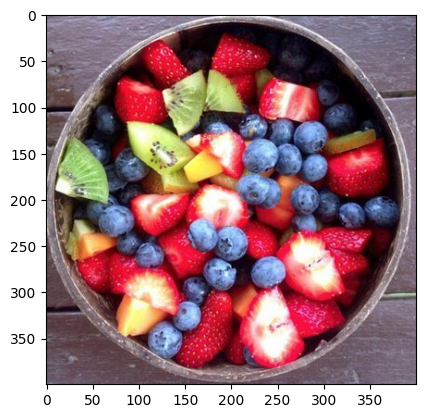

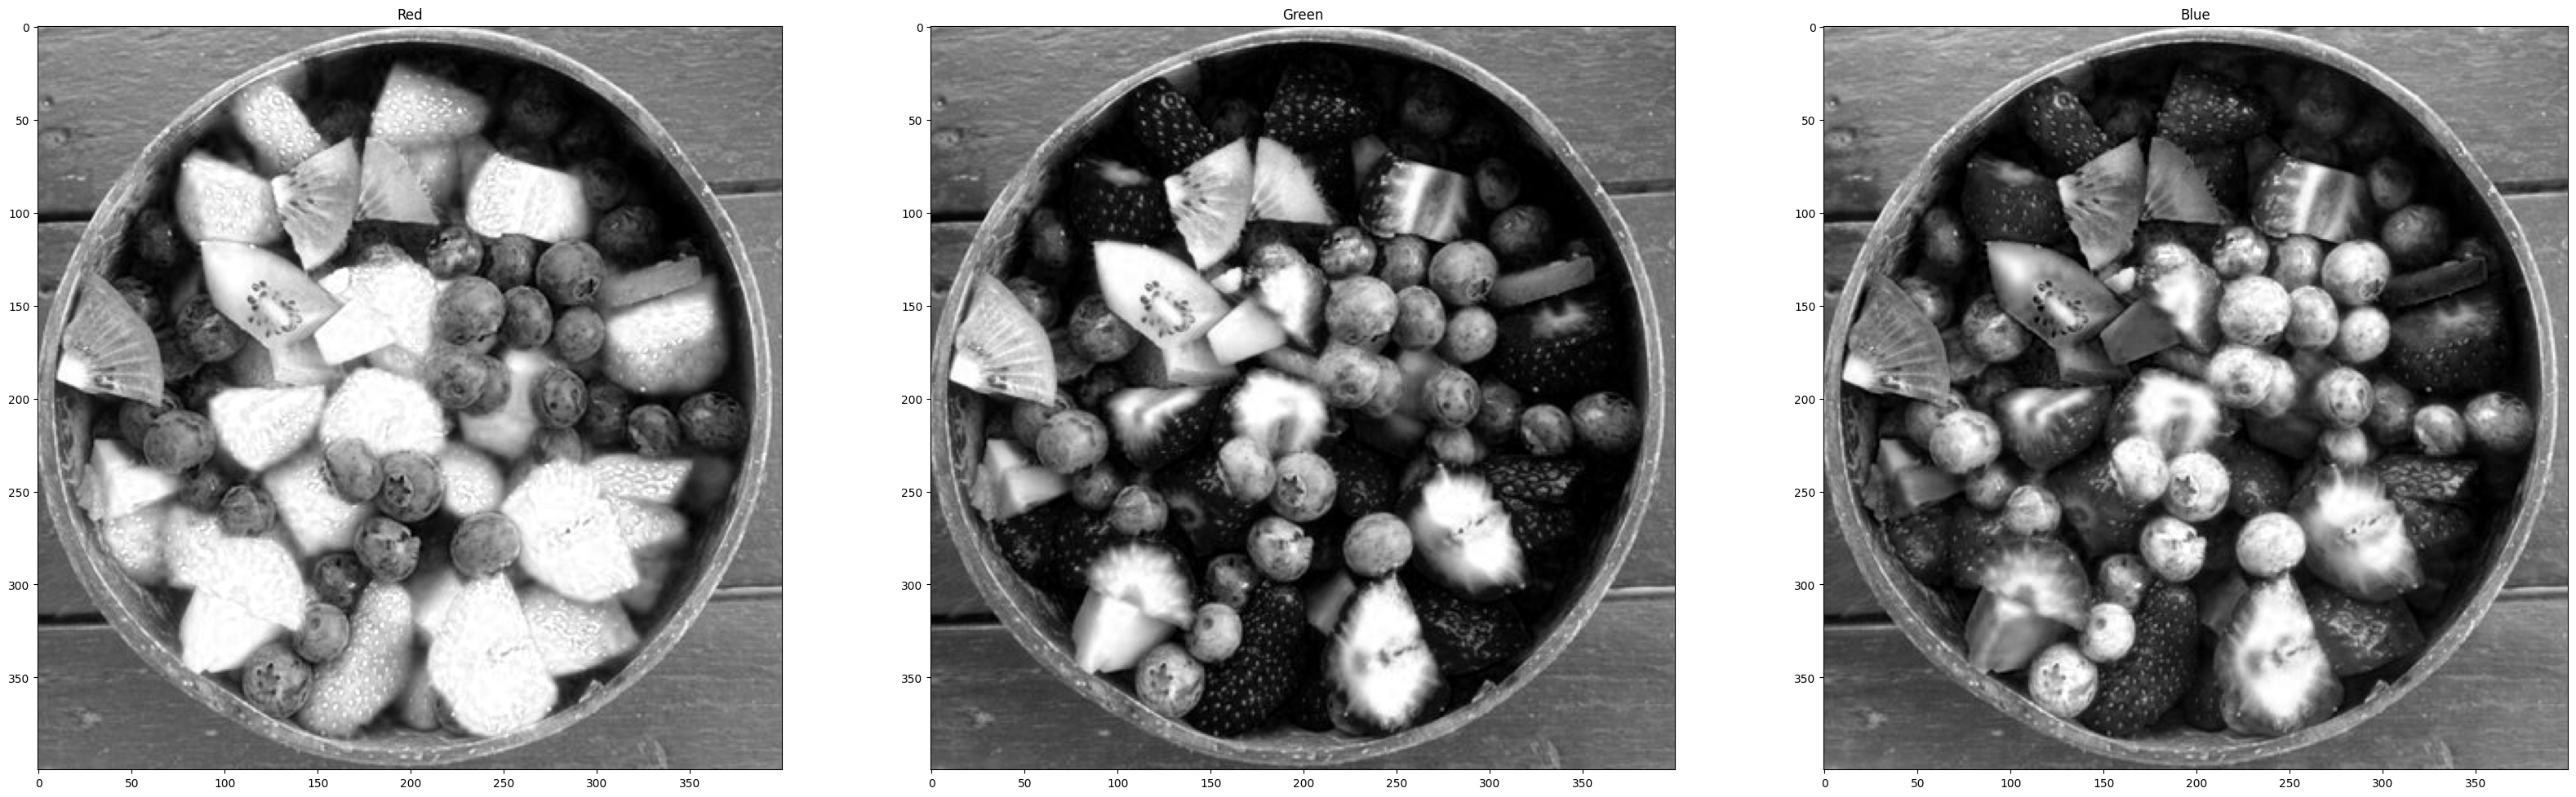

In [2]:
img_filename = "Berries.jpg"
img = cv2.imread(img_filename)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


plt.figure()
plt.imshow(img_rgb)


img_rgb = np.array(img_rgb)
img_r = img_rgb[..., 0]
img_g = img_rgb[..., 1]
img_b = img_rgb[..., 2]

plt.figure(figsize=(40, 20))
plt.subplot(1, 3, 1)
plt.imshow(img_r, cmap='gray')
plt.title("Red")

plt.subplot(1, 3, 2)
plt.imshow(img_g, cmap='gray')
plt.title("Green")

plt.subplot(1, 3, 3)
plt.imshow(img_b, cmap='gray')
plt.title("Blue")

plt.show()

#### (a) observations
- In red sub plane, the red part are extremely light, as all strawberries are light.
- In green sub plane, the green part are lighter, the fruit in green are light.
- In blue sub plane, the blue part are lighter, the blueberries are light. 

## (b)
Convert the RGB image to the HSV colorspace and display the H, S, and V channels
separately. Describe your observations.

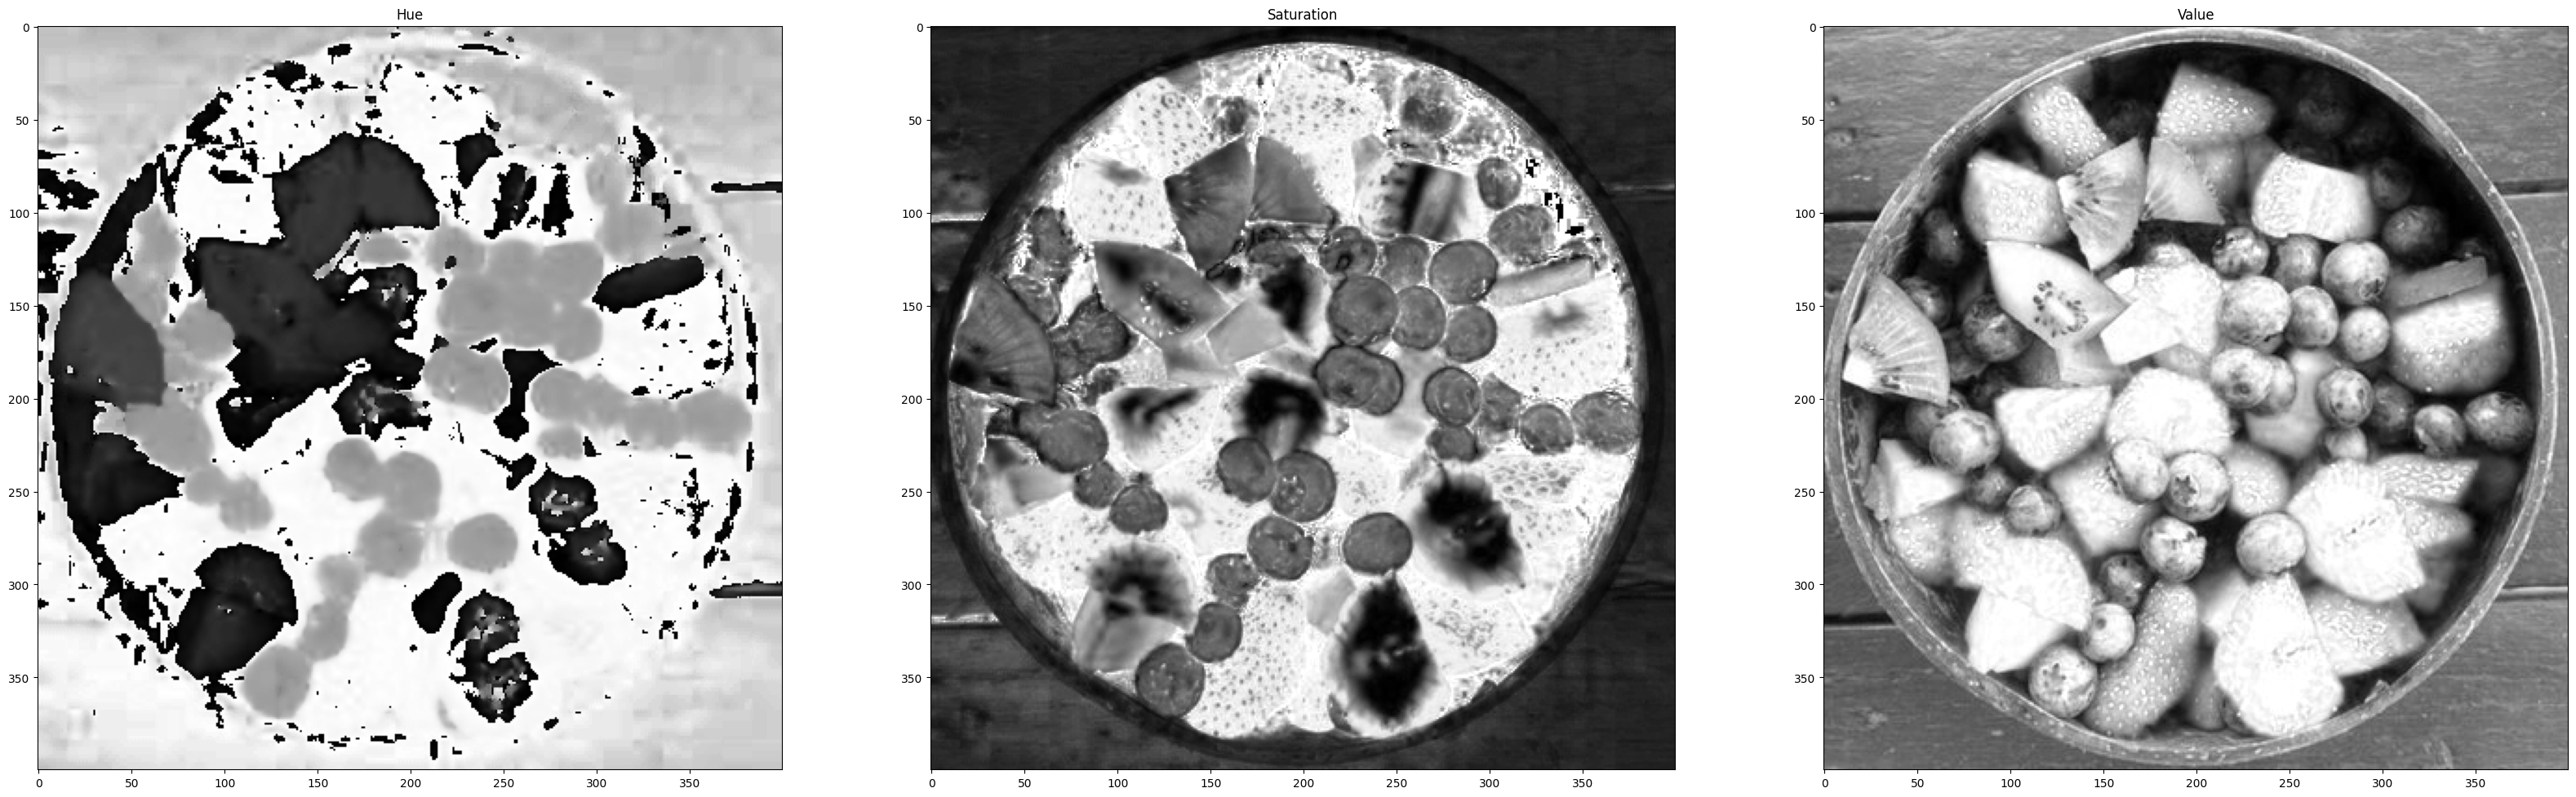

In [3]:
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

img_hsv = np.array(img_hsv)
img_h = img_hsv[..., 0]
img_s = img_hsv[..., 1]
img_v = img_hsv[..., 2]

plt.figure(figsize=(40, 20))
plt.subplot(1, 3, 1)
plt.imshow(img_h, cmap='gray')
plt.title("Hue")

plt.subplot(1, 3, 2)
plt.imshow(img_s, cmap='gray')
plt.title("Saturation")

plt.subplot(1, 3, 3)
plt.imshow(img_v, cmap='gray')
plt.title("Value")

plt.show()

#### (b) Observations
- In the hue plane, the green part is dark and the red part is light, while the blue part are in between.
- In the saturation plane, the strawberries (red) part is light.
- In the value plane, the image represents the image that was perceivable as a gray image.

## (c) 
Detect blue pixels, defined by having a hue in range [110, 130]. Your detected pixels should be in the form of a binary mask. Use this mask to display only the blue pixels of your original image, with the non-blue pixels displayed as black.

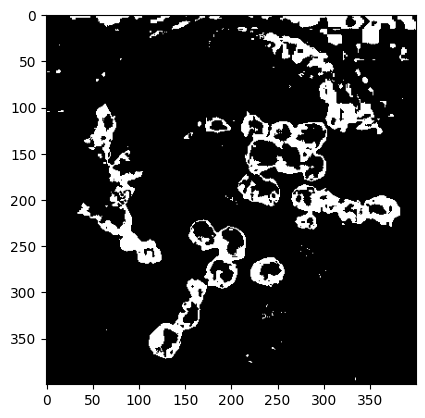

In [4]:
blue_mask = (img_h > 110) & (img_h < 130)
plt.imshow(blue_mask, cmap='gray')
plt.show()

# Problem 2 (Contrast Enhancement)

## (a) 
Load and display a low-contrast grayscale image

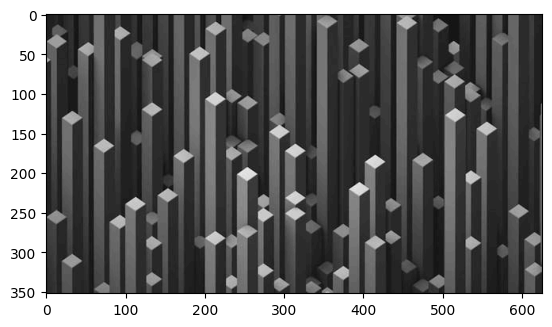

In [5]:
img_filename = "low-contrast.jpg"
img = cv2.imread(img_filename)
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.figure()
plt.imshow(img, cmap='gray')


## (b)
Calculate and plot the image’s histogram. Comment on the relation between the
image’s contrast and its histogram.

In [6]:
import itertools
def hist(img):
    hist_array = np.zeros(256, dtype=int)
    for y, x in itertools.product(range(img.shape[0]), range(img.shape[1])):
        hist_array[img[y, x]] += 1
    return hist_array

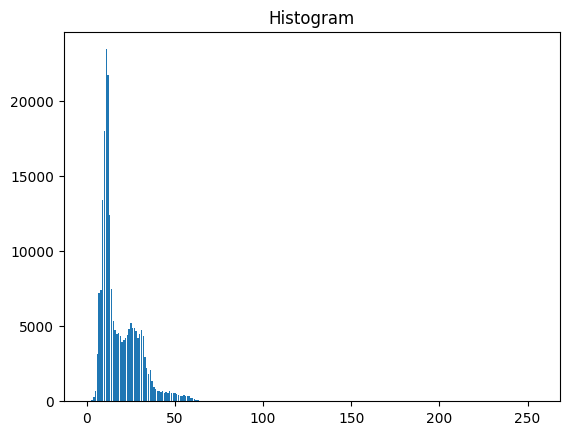

In [7]:
hist_array = hist(img)
plt.bar(range(len(hist_array)), hist_array)
plt.title("Histogram")
plt.show()


#### (b) comment
- The pixel values for the gray image concentrates within the range of [0, 75].
- The image is low contrast and some of the difference between columns in the image is barely visible

## (c)
Recall, we derived in lecture that the cumulative distribution function (CDF) of the
histogram is the theoretic optimal histogram-equalization transformation function.
Plot the CDF of your histogram. Is this an appropriate equalization function? Why
or why not?

#### Comment
Yes, this is a appropriate equalization function since it assigns low value pixels with high values. Through the process, it would be able to compress the number of low value pixels and spread out the distribution for the pixel values of the image. 

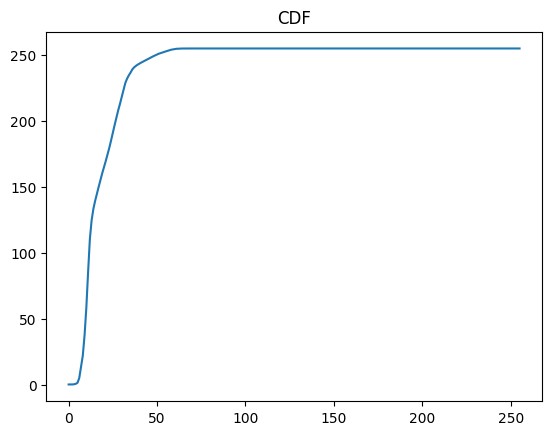

In [8]:
cdf_array = hist_array.cumsum()
cdf_array = cdf_array / cdf_array[-1] * 255
plt.plot(range(len(cdf_array)), cdf_array)
plt.title("CDF")
plt.show()


## (d)
Apply the CDF as a transformation function to your image1
. Display your transformed image and its histogram. Has your image’s histogram been equalized? Comment on the your original image and histogram vs. the transformed image and
histogram

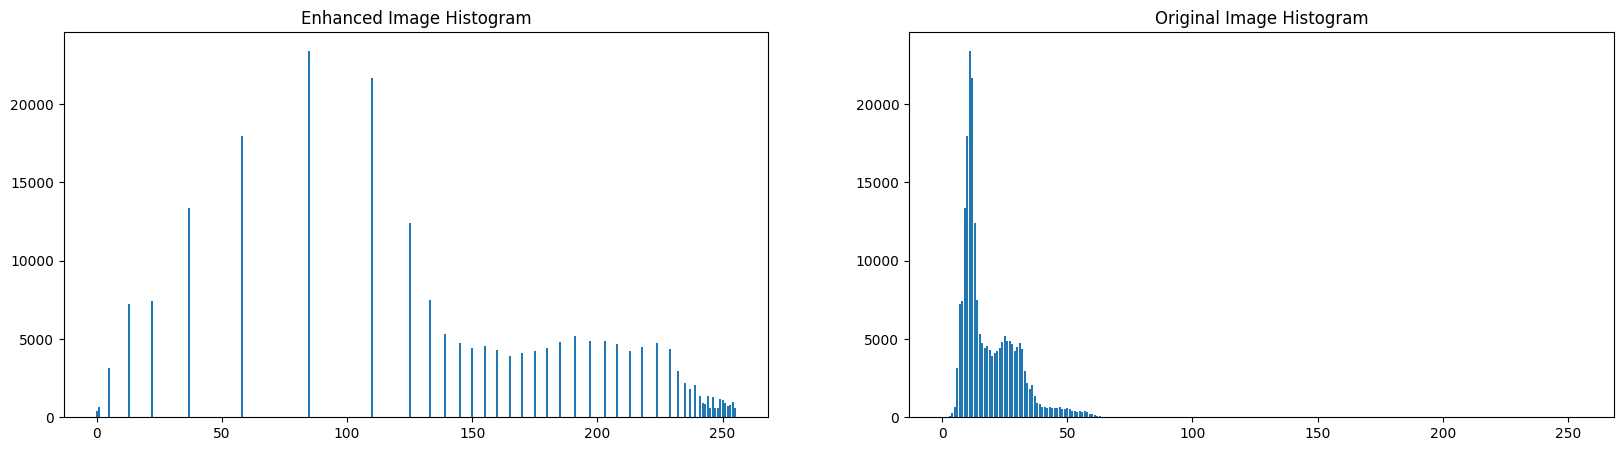

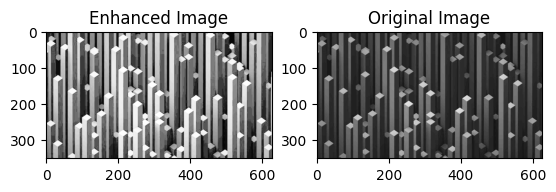

In [9]:
img_enhanced = np.round(cdf_array[img]).astype(np.uint8)
img_enhanced_hist_array = hist(img_enhanced)
plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
plt.bar(range(len(img_enhanced_hist_array)), img_enhanced_hist_array)
plt.title("Enhanced Image Histogram")

plt.subplot(1, 2, 2)
plt.bar(range(len(hist_array)), hist_array)
plt.title("Original Image Histogram")
plt.show()

plt.figure()
plt.subplot(1, 2, 1)
plt.title("Enhanced Image")
plt.imshow(img_enhanced, cmap='gray')
plt.subplot(1, 2, 2)
plt.title("Original Image")
plt.imshow(img, cmap='gray')
plt.show()

#### Comment
- The enhanced image's histogram is not perfectly flat out.
- However, the enhanced image's histogram is a spread out version of the original histogram. Where the range of pixels from 0-75 was converted to 0-255 in a more sparse distribution.
- The image is more contrast and the columns' difference are more visible in the enhanced image. 